In [11]:
import numpy as np

data = np.array([[[0,1],[2,3],[4,5]],
                 [[6,7],[8,9],[10,11]],
                 [[12,13],[14,15],[16,17]],
                 [[18,19],[20,21],[22,23]],])

print(data.shape)

output = np.mean(data, axis=1)
print(output)
print(output.shape)

(4, 3, 2)
[[ 2.  3.]
 [ 8.  9.]
 [14. 15.]
 [20. 21.]]
(4, 2)


In [10]:
import numpy as np

data = np.array([[1,2,3],
                 [4,5,6],])

print(data.shape)

output = np.mean(data, axis=1)
print(output)
print(output.shape)

(2, 3)
[2. 5.]
(2,)


In [4]:
import numpy as np
points = np.array([[0,1],[2,3],[4,5],[5,2]])
indices = np.array([[0,1],[0,2],[0,3]])

edge = points[indices]
print(edge.shape)
print(edge)

(3, 2, 2)
[[[0 1]
  [2 3]]

 [[0 1]
  [4 5]]

 [[0 1]
  [5 2]]]


In [8]:
import numpy as np

points = np.array([[0,1],
                   [2,3],
                   [4,5],
                   [5,2]])

print(points.max(0))


[5 5]


$\lambda $
$$
f(x) = \int_{-\infty}^{\infty} e^{-x^2} dx
$$

In [13]:
import torch

w = torch.tensor([5], dtype=float, requires_grad=True)
b = torch.tensor([2], dtype=float, requires_grad=True)

y = w * 3 + b
y.backward()
b.requires_grad_(False)
y = w*4+b
y.backward()
b.requires_grad_(True)
y = w*4+b
y.backward()
print(w.grad)
print(b.grad)

tensor([11.], dtype=torch.float64)
tensor([2.], dtype=torch.float64)


In [7]:
import torch

fake_data = torch.randn((100,3))
target = torch.ones_like(fake_data)
print(torch.nn.functional.mse_loss(fake_data, target))
print((fake_data-target).pow(2).mean())

fake_data = torch.nn.functional.sigmoid(fake_data)
print(torch.nn.functional.binary_cross_entropy(fake_data, target))


tensor(2.0027)
tensor(2.0027)
tensor(0.8041)


In [ ]:
import torch
fake_data = torch.randn((100,3))
target_real_vertex = torch.FloatTensor(fake_data.size()).uniform_(0.9, 1.0)
print(target_real_vertex)

In [27]:
import torch

fake_data = torch.randn((5,3))
layer_1 = torch.nn.Linear(3,1)
layer_2 = torch.nn.Linear(1,1)
target_real_vertex = torch.ones((5,1))

predict = layer_1(fake_data)
predict = predict.detach()
print(predict)
predict = layer_2(predict)
loss_value = torch.nn.functional.mse_loss(predict, target_real_vertex)
optimizer_1 = torch.optim.Adam(layer_1.parameters(), lr=0.1)
optimizer_2 = torch.optim.Adam(layer_2.parameters(), lr=0.1)

loss_value.backward()
optimizer_1.step()
optimizer_2.step()
predict_again = layer_1(fake_data)
print(predict_again)

tensor([[-2.3242],
        [-1.0586],
        [-0.9134],
        [-0.9626],
        [-0.3137]])
tensor([[-2.3242],
        [-1.0586],
        [-0.9134],
        [-0.9626],
        [-0.3137]], grad_fn=<AddmmBackward0>)


In [8]:
import torch

a = torch.tensor([[1,1,1,1],
                  [4,5,6,6]], dtype=float)

b = torch.tensor([[-2,-2,-2,-2],
                  [1,1,1,2]], dtype=float)

print(torch.nn.functional.cosine_similarity(a, b, dim=1))

tensor([-1.0000,  0.9600], dtype=torch.float64)


In [5]:
import torch

a = torch.ones((3))
a = a if len(a.size())==2 else a.unsqueeze(0)
print(a.size())

torch.Size([1, 3])


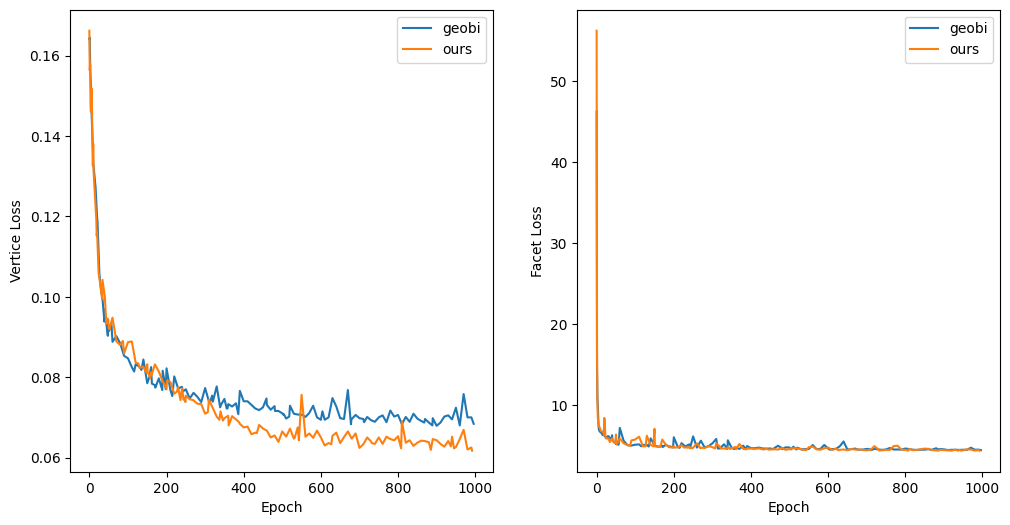

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Read file from CSV file
geobi_df = pd.read_csv(r"..\log\GeoBi-GNN_Synthetic_train\train_geo_bi\excel.csv")
ours_df = pd.read_csv(r"..\log\GeoBi-GNN_Synthetic_train\train_gan\excel.csv")

geobi_df.head()
# Plot vertice loss
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(geobi_df["epoch"], geobi_df["vertice_error"], label="geobi")
plt.plot(ours_df["epoch"], ours_df["vertice_error"], label="ours")
plt.xlabel("Epoch")
plt.ylabel("Vertice Loss")
plt.legend()

# Plot facet loss
plt.subplot(1, 2, 2)
plt.plot(geobi_df["epoch"], geobi_df["facet_error"], label="geobi")
plt.plot(ours_df["epoch"], ours_df["facet_error"], label="ours")
plt.xlabel("Epoch")
plt.ylabel("Facet Loss")
plt.legend()

plt.show()
